## Introduction to Image Analysis

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

# %matplotlib notebook
# to make matplotlib interactive in jupyter notebook

In [2]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)


In [3]:
print(im_org.shape)

(512, 512)


In [4]:
print(im_org.dtype)

uint8


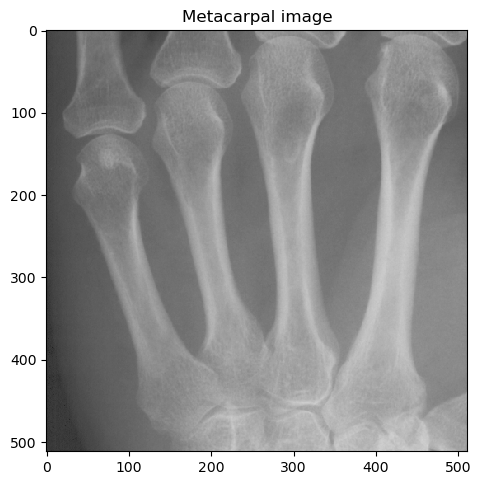

In [5]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()


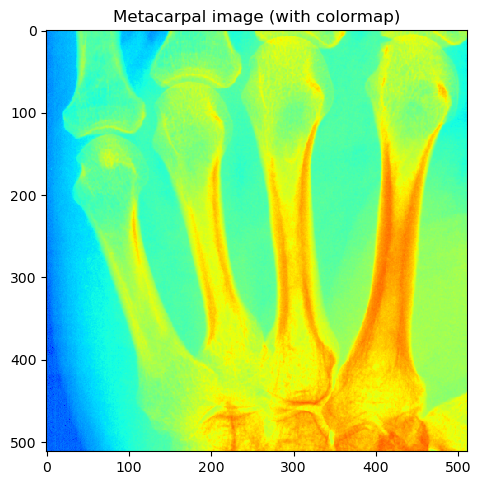

In [6]:
# display an image using colormap
# more colormap options are available
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

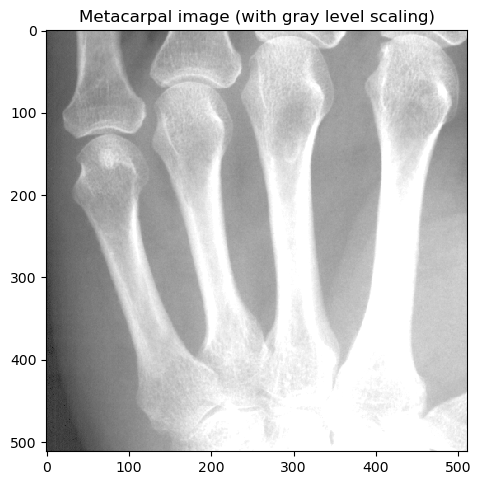

In [7]:
# pixels with vmin are visualized black, vmin visualised white
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

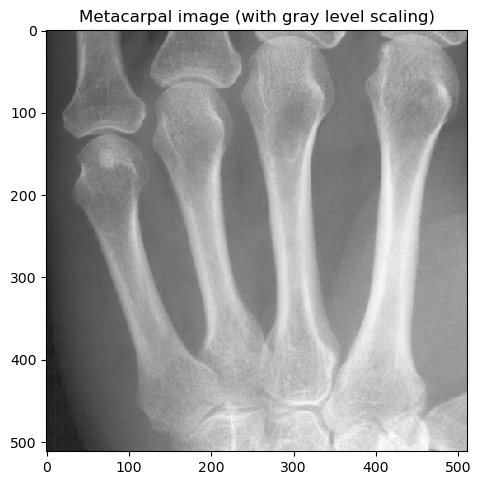

In [8]:
# automate the scaling of visualisation
io.imshow(im_org, vmin = im_org.min(), vmax = im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()


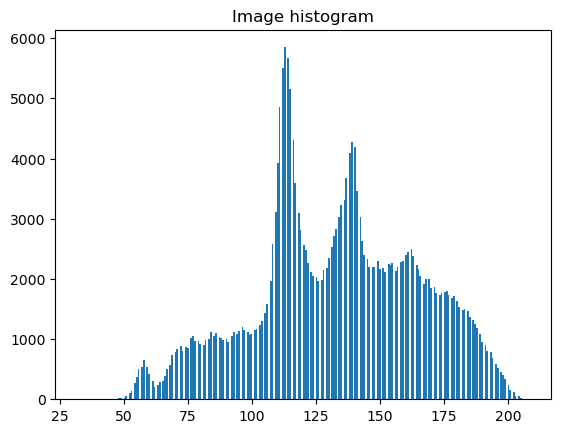

In [9]:
# ravel() converts image into a 1D array for histogran
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()


There are 1147.0 pixel values in bin 100
Bin edges: 100.75 to 101.4375


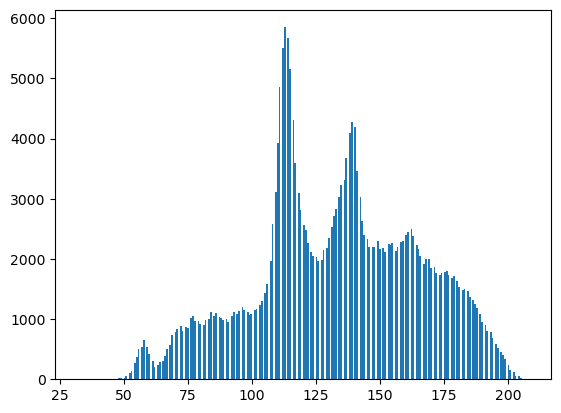

In [10]:
# h contains a list of tuples: (bin count, bin edge)
h = plt.hist(im_org.ravel(), bins=256)

bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

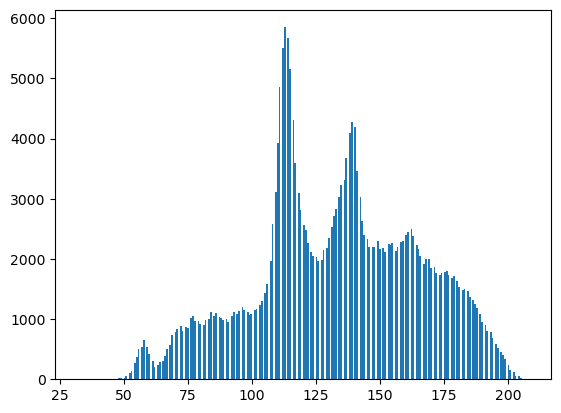

In [11]:
# alternative way to call histogram()
y, x, _ = plt.hist(im_org.ravel(), bins=256)
# print(y) # bin count
# print(x) # bin edges

In [12]:
# obtain value of specified pixel
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108
The pixel value at (r,c) = (110, 90) is: 120


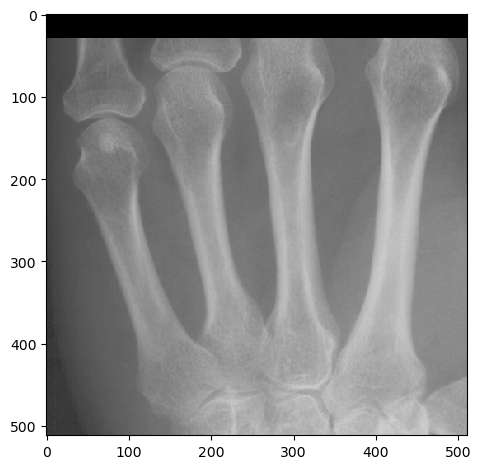

In [13]:
# pixel (0,0) is at the top left of img
# numpy slicing: set pixels of top 30 rows to be 0
im_org[:30] = 0
io.imshow(im_org)
io.show()

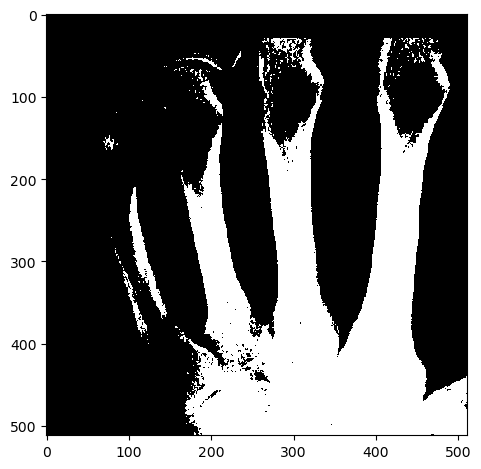

In [14]:
# thresholding
# pixel values > 150 become 1
# while values <= 150 become 0
mask = im_org > 150

io.imshow(mask)
io.show()

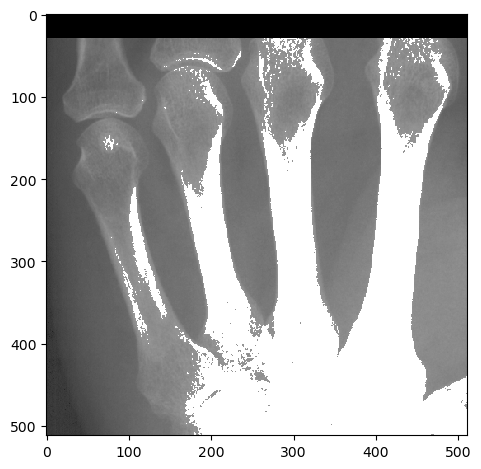

In [15]:
im_org[mask] = 255
# all true elements become 255
io.imshow(im_org)
io.show()

In [16]:
im_name = "ardeche.jpg"
im_org = io.imread(in_dir + im_name)
# print(im_org.shape)
rows = im_org.shape[0]
cols = im_org.shape[1]
print("rows: {}".format(rows))
print("cols: {}".format(cols))
# print(im_org.dtype)

# assign a (R,G,B) to a pixel
r = 110
c = 90
im_org[r, c] = [255, 0, 0]

rows: 600
cols: 800


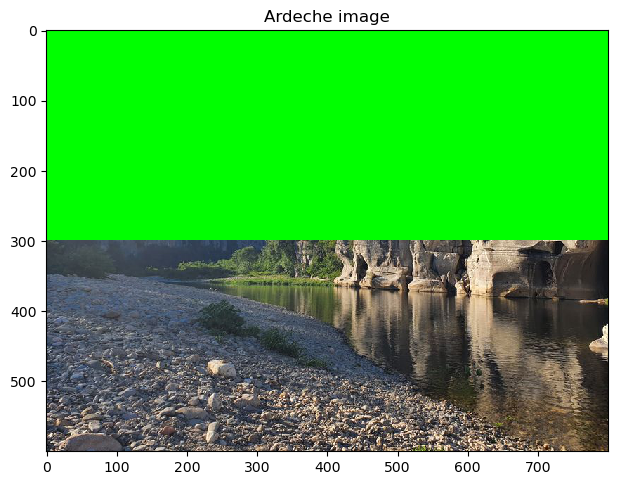

In [17]:
# color upperhalf of the photo green using np slicing
im_org[0:rows//2, ] = [0, 255, 0]
io.imshow(im_org)
plt.title('Ardeche image')
io.show()

uint8
float64


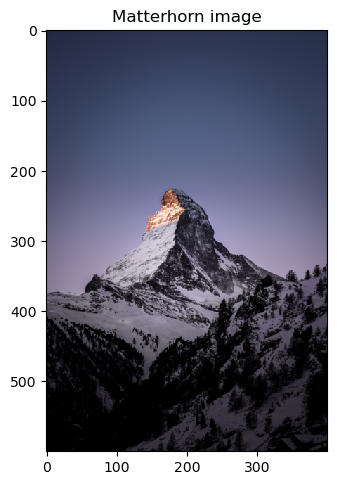

In [18]:
im_name = "Matterhorn.jpg"
im_org = io.imread(in_dir + im_name)
cols = im_org.shape[1]
print(im_org.dtype)

# automate rescaling to have resulting width always equal to 400
image_rescaled = rescale(im_org, 400/cols, anti_aliasing=True,
                         channel_axis=2)
print(image_rescaled.dtype)

io.imshow(image_rescaled)
plt.title('Matterhorn image')
io.show()

float64
uint8


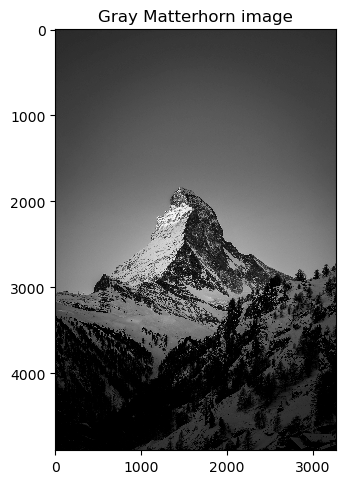

In [19]:
# transform to gray-level img
im_gray = color.rgb2gray(im_org)
print(im_gray.dtype)

# force pixel type into unsigned bytes
im_byte = img_as_ubyte(im_gray)
print(im_byte.dtype)

io.imshow(im_byte)
plt.title('Gray Matterhorn image')
io.show()

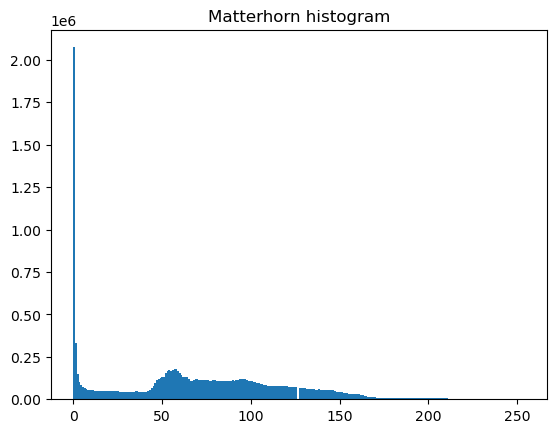

In [20]:
plt.hist(im_byte.ravel(), bins=256)
plt.title('Matterhorn histogram')
io.show()

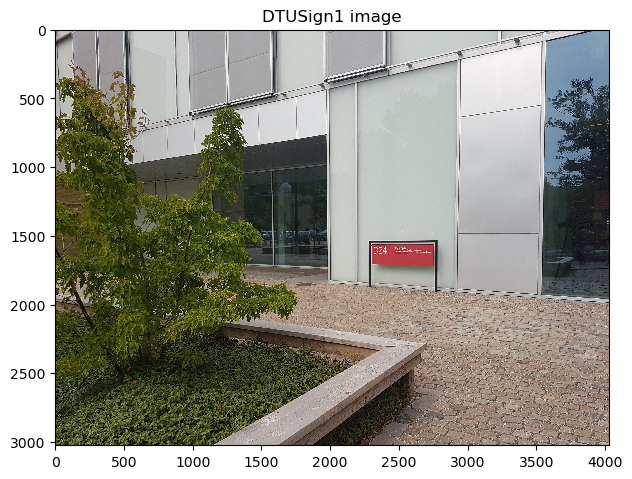

In [21]:
im_name = "DTUSign1.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.title('DTUSign1 image')
io.show()

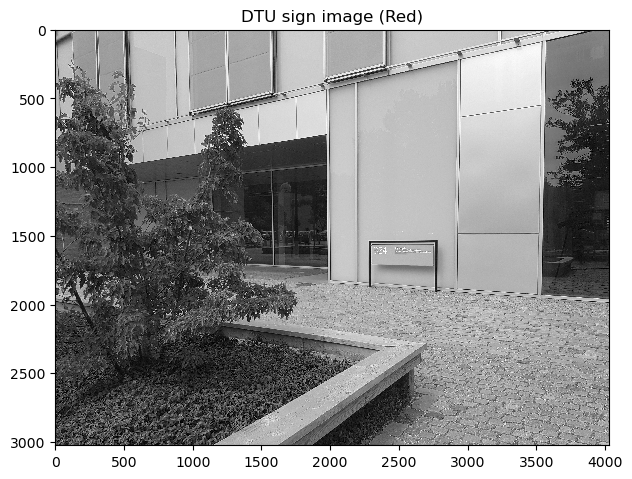

In [22]:
# visualise red component of img
r_comp = im_org[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

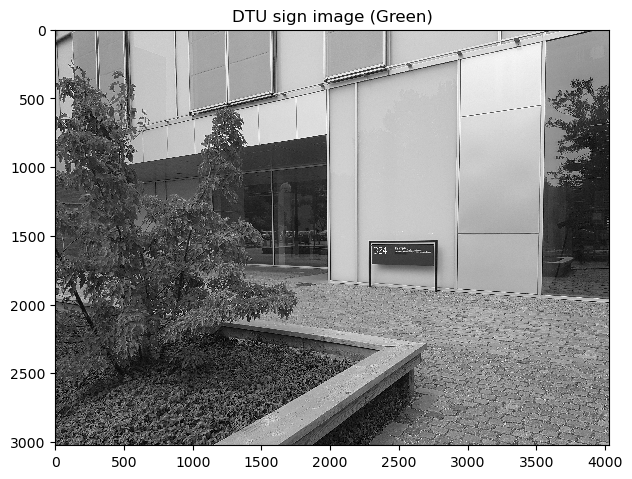

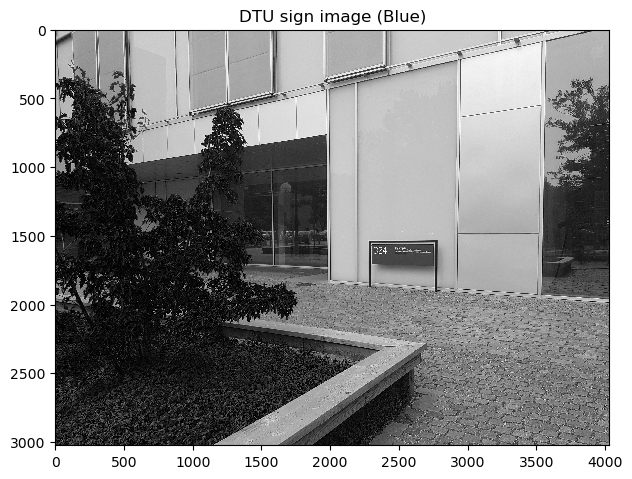

In [23]:
# visualise green component of img
g_comp = im_org[:, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

# visualise blue component of img
b_comp = im_org[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()

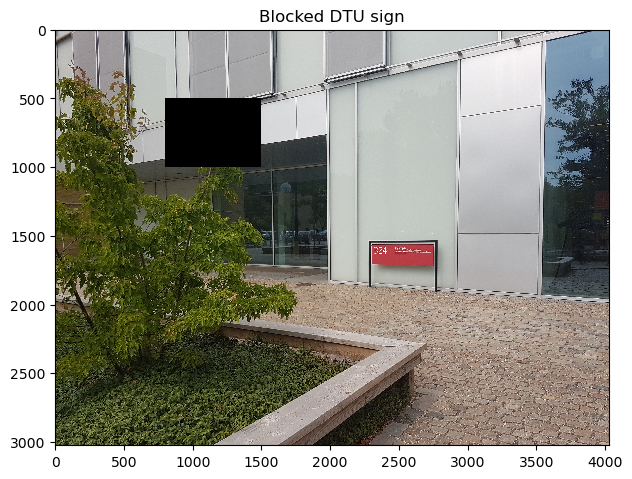

In [24]:
# create a black rectangle in img
im_org[500:1000, 800:1500, :] = 0
io.imshow(im_org)
plt.title('Blocked DTU sign')
io.show()

In [25]:
# save the img to folder
io.imsave("data/Blocked_DTUSign.jpg", im_org)

im_org[500:1000, 800:1500, :] = [0, 0, 255]
io.imsave("data/Blocked_DTUSign_blue.jpg", im_org)


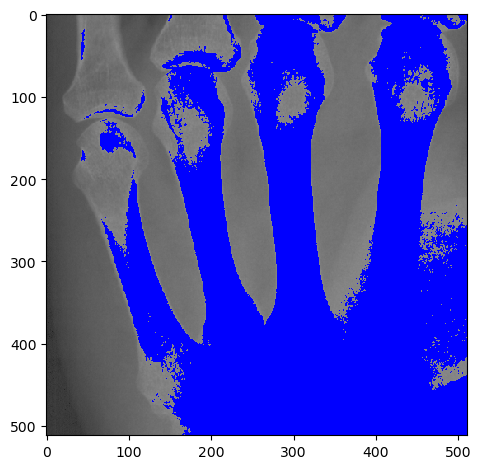

In [26]:
# make the bone in the image appear blue
im_name = "metacarpals.png"
im_org = io.imread(in_dir + im_name)

# thresholding
mask = im_org > 135
im_rgb = color.gray2rgb(im_org)
im_rgb[mask, :] = 0  
# changes are only made to the TRUE values of mask
# non-bone pixels are not affected
# make RGB channels of bones all 0

# print(im_rgb)
im_rgb[mask, 2] = 255 # make B channgel of bones 255
# print(im_rgb)

io.imshow(im_rgb)
# plt.title('Blue Metacarpals')
io.show()


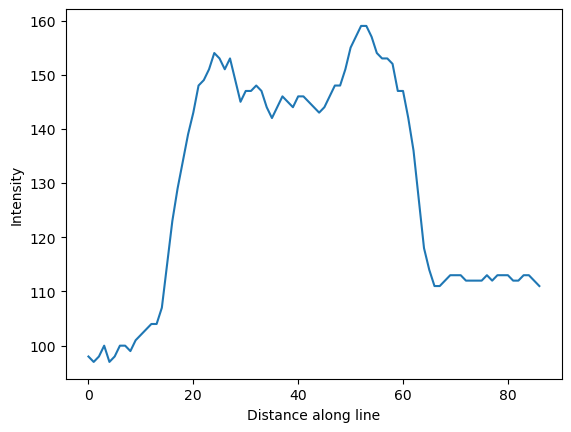

In [27]:
# sample a profile across the img
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

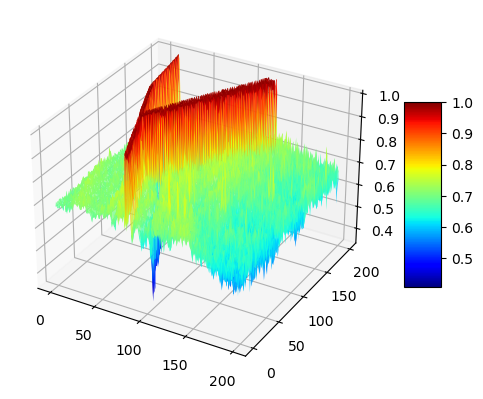

In [28]:
# 3D view of pixel values, where height = gray level
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

# %matplotlib notebook 

plt.show()


In [29]:
# read a dicom file
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [30]:
im = ds.pixel_array

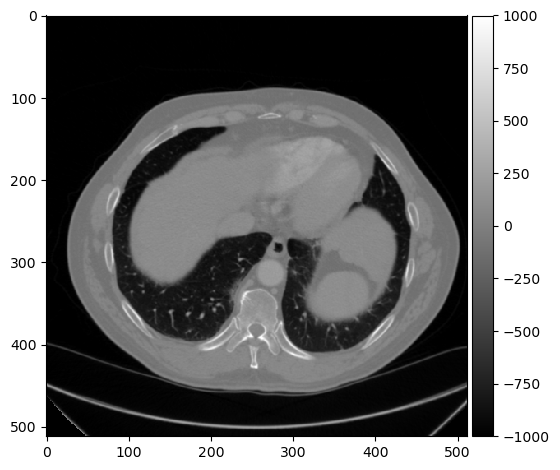

In [31]:
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()